# Procesamiento Digital de Imagenes - TP7


### Functions and libraries

In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
import time

In [ ]:
def circle(r, threshold = 0.3):
    vec = np.linspace(-r, r, r*2+1)
    [x,y] = np.meshgrid(vec,vec) 
    se = (x**2 + y**2)**0.5 < (r + threshold)
    return se

def circlef(r):
    se_bin = circle(r)
    kernel = se_bin.astype(np.float)
    kernel /= kernel.sum()
    return kernel

### Convolution in Fourier domain

In [ ]:
def conv_fft(image, kernel):
  s1 = np.array(kernel.shape)
  s2 = np.array(image.shape)
  image_size = image.shape[0]
  kernel_size = int(np.floor((kernel.shape[0]/2)))

  size = s2 + s1 -1

  fsize = 2 ** np.ceil(np.log2(size)).astype(int)
  fslice = tuple([slice(0, int(sz)) for sz in size])

  image_fft = np.fft.fft2(image, fsize)
  kernel_fft = np.fft.fft2(kernel, fsize)
  result = np.fft.ifft2(image_fft * kernel_fft)[fslice].copy()

  return result.real[kernel_size : kernel_size + image_size, kernel_size : kernel_size + image_size]

### Inverse filter

In [ ]:
def inverse_filter(image, kernel):
  s1 = np.array(kernel.shape)
  s2 = np.array(image.shape)
  image_size = image.shape[0]
  kernel_size = int(np.floor((kernel.shape[0]/2)))

  size = s2 + s1 -1

  fsize = 2 ** np.ceil(np.log2(size)).astype(int)
  fslice = tuple([slice(0, int(sz)) for sz in size])

  image_fft = np.fft.fft2(image, fsize)
  kernel_fft = np.fft.fft2(kernel, fsize)
  result = np.fft.ifft2(image_fft / kernel_fft)

  return result.real[0 : image_size - 2*kernel_size, 0 : image_size - 2*kernel_size]

### Wiener filter

In [ ]:
def wiener_2d(image, kernel, K):
  s1 = np.array(kernel.shape)
  s2 = np.array(image.shape)
  image_size = image.shape[0]
  kernel_size = int(np.floor((kernel.shape[0]/2)))

  size = s2 + s1 -1

  fsize = 2 ** np.ceil(np.log2(size)).astype(int)
  fslice = tuple([slice(0, int(sz)) for sz in size])

  kernel_fft = np.fft.fft2(kernel, fsize)
  kernel_fft_module_sqr = np.square(np.absolute(kernel_fft))
  wiener = np.conjugate(kernel_fft) / ( kernel_fft_module_sqr + K )

  image_fft = np.fft.fft2(image, fsize)
  result = np.fft.ifft2(image_fft * wiener)[fslice].copy()

  return result.real[kernel_size : kernel_size + image_size, kernel_size : kernel_size + image_size]

### Starting snippet

In [ ]:
kernel = circlef(7)
im = imageio.imread('imageio:camera.png')/255.

### Connection between Convolution and FFT

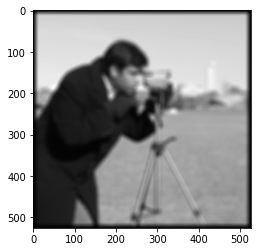

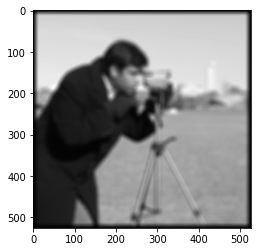

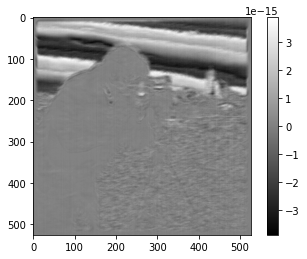

In [ ]:
_conv = signal.convolve(im, kernel, 'full', method = 'direct')
plt.imshow(_conv, 'gray')
plt.show()

s = np.array(kernel.shape)//2
_conv2 = conv_fft(np.pad(im,[(s[0],s[0]),(s[1],s[1])]), kernel)
plt.imshow(_conv2, 'gray')
plt.show()

plt.imshow(_conv - _conv2, 'gray')
plt.colorbar()
plt.show()

### Deconvolution

#### Inverse filter

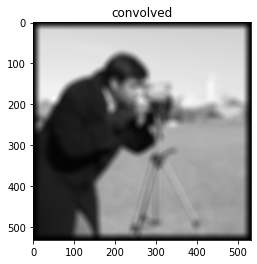

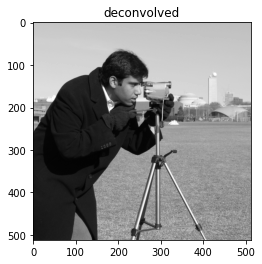

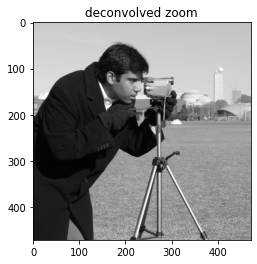

In [ ]:
kernel = circlef(10)
_conv = signal.convolve(im, kernel, 'full')

plt.imshow(_conv, 'gray')
plt.title('convolved')
plt.show()

rec_d = inverse_filter(_conv, kernel)
plt.imshow(rec_d,'gray')
plt.title('deconvolved')
plt.show()

plt.imshow(rec_d[20:-20,20:-20],'gray')
plt.title('deconvolved zoom')
plt.show()

#### Wiener filter

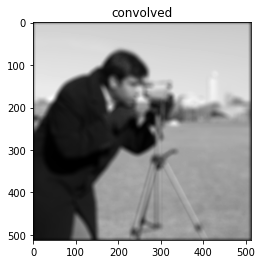

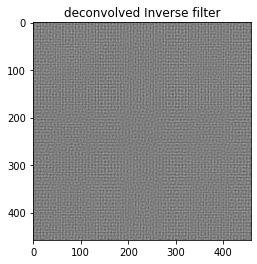

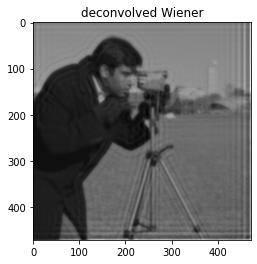

In [ ]:
kernel = circlef(7)
_conv = signal.convolve(im, kernel, 'same')

plt.imshow(_conv, 'gray')
plt.title('convolved')
plt.show()

rec_inv = inverse_filter(_conv, kernel)
rec_d = wiener_2d(_conv, kernel, K=0.01)

plt.imshow(rec_inv[20:-20,20:-20],'gray')
plt.title('deconvolved Inverse filter')
plt.show()

plt.imshow(rec_d[20:-20,20:-20],'gray')
plt.title('deconvolved Wiener')
plt.show()